## Installs and Imports

In [42]:
import math
from collections import Counter
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

## Implementation from Scratch

### Utils

In [10]:
def entropy(labels):
    total = len(labels)
    counts = Counter(labels)
    return -sum((count / total) * math.log2(count / total) for count in counts.values() if count > 0)

In [11]:
def information_gain(data, labels, feature_index):
    total_entropy = entropy(labels)
    subsets = {}
    for i, row in enumerate(data):
        feature_value = row[feature_index]
        if feature_value not in subsets:
            subsets[feature_value] = []
        subsets[feature_value].append(labels[i])

    subset_entropy = sum((len(subset) / len(labels)) * entropy(subset) for subset in subsets.values())
    return total_entropy - subset_entropy

In [12]:
def find_best_split(data, labels):
    features = data[0].keys()
    best_gain = 0
    best_feature = -1
    for feature in features:
        gain = information_gain(data, labels, feature)
        print(feature, gain)
        if gain > best_gain:
            best_gain = gain
            best_feature = feature
    
    print("---")
    return best_feature

In [13]:
def build_tree(data, labels, features):
    if len(set(labels)) == 1:
        return labels[0]  # All labels are the same
    if not features:
        return Counter(labels).most_common(1)[0][0]  # Return the most common label

    best_feature = find_best_split(data, labels)
    if best_feature == -1:
        return Counter(labels).most_common(1)[0][0]

    tree = {best_feature: {}}
    unique_values = set(row[best_feature] for row in data)
    remaining_features = [f for f in features if f != best_feature]

    for value in unique_values:
        subset_data = [{k: v for k, v in row.items() if k != best_feature} for row in data if row[best_feature] == value]
        subset_labels = [label for row, label in zip(data, labels) if row[best_feature] == value]
        tree[best_feature][value] = build_tree(subset_data, subset_labels, remaining_features)

    return tree

### Data

In [35]:
features = ["Alt", "Bar", "Fri", "Hun", "Pat", "Price", "Rain", "Res", "Type", "Est"]
data = [
    {"Alt": "Yes", "Bar": "No", "Fri": "No", "Hun": "Yes", "Pat": "Some", "Price": "$$$", "Rain": "No", "Res": "Yes", "Type": "French", "Est": "0-10"},
    {"Alt": "Yes", "Bar": "No", "Fri": "No", "Hun": "Yes", "Pat": "Full", "Price": "$", "Rain": "No", "Res": "No", "Type": "Thai", "Est": "30-60"},
    {"Alt": "No", "Bar": "Yes", "Fri": "No", "Hun": "No", "Pat": "Some", "Price": "$", "Rain": "No", "Res": "No", "Type": "Burger", "Est": "0-10"},
    {"Alt": "Yes", "Bar": "No", "Fri": "Yes", "Hun": "Yes", "Pat": "Full", "Price": "$", "Rain": "Yes", "Res": "No", "Type": "Thai", "Est": "10-30"},
    {"Alt": "Yes", "Bar": "No", "Fri": "Yes", "Hun": "No", "Pat": "Full", "Price": "$$$", "Rain": "No", "Res": "Yes", "Type": "French", "Est": ">60"},
    {"Alt": "No", "Bar": "Yes", "Fri": "No", "Hun": "Yes", "Pat": "Some", "Price": "$$", "Rain": "Yes", "Res": "Yes", "Type": "Italian", "Est": "0-10"},
    {"Alt": "No", "Bar": "Yes", "Fri": "No", "Hun": "No", "Pat": "None", "Price": "$", "Rain": "Yes", "Res": "No", "Type": "Burger", "Est": "0-10"},
    {"Alt": "No", "Bar": "No", "Fri": "No", "Hun": "Yes", "Pat": "Some", "Price": "$$", "Rain": "Yes", "Res": "Yes", "Type": "Thai", "Est": "0-10"},
    {"Alt": "No", "Bar": "Yes", "Fri": "Yes", "Hun": "No", "Pat": "Full", "Price": "$", "Rain": "Yes", "Res": "No", "Type": "Burger", "Est": ">60"},
    {"Alt": "Yes", "Bar": "Yes", "Fri": "Yes", "Hun": "Yes", "Pat": "Full", "Price": "$$$", "Rain": "No", "Res": "Yes", "Type": "Italian", "Est": "10-30"},
    {"Alt": "No", "Bar": "No", "Fri": "No", "Hun": "No", "Pat": "None", "Price": "$", "Rain": "No", "Res": "No", "Type": "Thai", "Est": "0-10"},
    {"Alt": "Yes", "Bar": "Yes", "Fri": "Yes", "Hun": "Yes", "Pat": "Full", "Price": "$", "Rain": "No", "Res": "No", "Type": "Burger", "Est": "30-60"},
]
labels = [
    "Yes", "No", "Yes", "Yes", "No", "Yes", "No", "Yes", "No", "No", "No", "Yes"
]

### Run

In [36]:
decision_tree = build_tree(data, labels, features)

Alt 0.0
Bar 0.0
Fri 0.020720839623907805
Hun 0.19570962879973086
Pat 0.5408520829727552
Price 0.19570962879973075
Rain 0.020720839623907805
Res 0.020720839623907805
Type 1.1102230246251565e-16
Est 0.20751874963942196
---
Alt 0.109170338675599
Bar 0.0
Fri 0.109170338675599
Hun 0.2516291673878229
Price 0.2516291673878229
Rain 0.044110417748401076
Res 0.2516291673878229
Type 0.2516291673878229
Est 0.2516291673878229
---
Alt 0.0
Bar 0.0
Fri 0.31127812445913283
Price 0.31127812445913283
Rain 0.31127812445913283
Res 0.31127812445913283
Type 0.5
Est 0.0
---
Alt 0.0
Bar 0.0
Fri 1.0
Price 0.0
Rain 1.0
Res 0.0
Est 1.0
---


Print the tree:

In [37]:
print(decision_tree)

{'Pat': {'Full': {'Hun': {'No': 'No', 'Yes': {'Type': {'Burger': 'Yes', 'Thai': {'Fri': {'No': 'No', 'Yes': 'Yes'}}, 'Italian': 'No'}}}}, 'None': 'No', 'Some': 'Yes'}}


## Implementation using Sklearn Library

### Method 1

#### Data

Translate data to new format (using ChatGPT):

In [38]:
features_2 = ["Alt", "Bar", "Fri", "Hun", "Pat", "Price", "Rain", "Res", "Type", "Est"]

data_2 = [
    [1, 0, 0, 1, 1, 2, 0, 1, 0, 0],  # Data point 1
    [1, 0, 0, 1, 2, 0, 0, 0, 1, 2],  # Data point 2
    [0, 1, 0, 0, 1, 0, 0, 0, 2, 0],  # Data point 3
    [1, 0, 1, 1, 2, 0, 1, 0, 1, 1],  # Data point 4
    [1, 0, 1, 0, 2, 2, 0, 1, 0, 3],  # Data point 5
    [0, 1, 0, 1, 1, 1, 1, 1, 3, 0],  # Data point 6
    [0, 1, 0, 0, 0, 0, 1, 0, 2, 0],  # Data point 7
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 0],  # Data point 8
    [0, 1, 1, 0, 2, 0, 1, 0, 2, 3],  # Data point 9
    [1, 1, 1, 1, 2, 2, 0, 1, 3, 1],  # Data point 10
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],  # Data point 11
    [1, 1, 1, 1, 2, 0, 0, 0, 2, 2],  # Data point 12
]

labels_2 = [1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1]  # "Yes" -> 1, "No" -> 0

#### Run

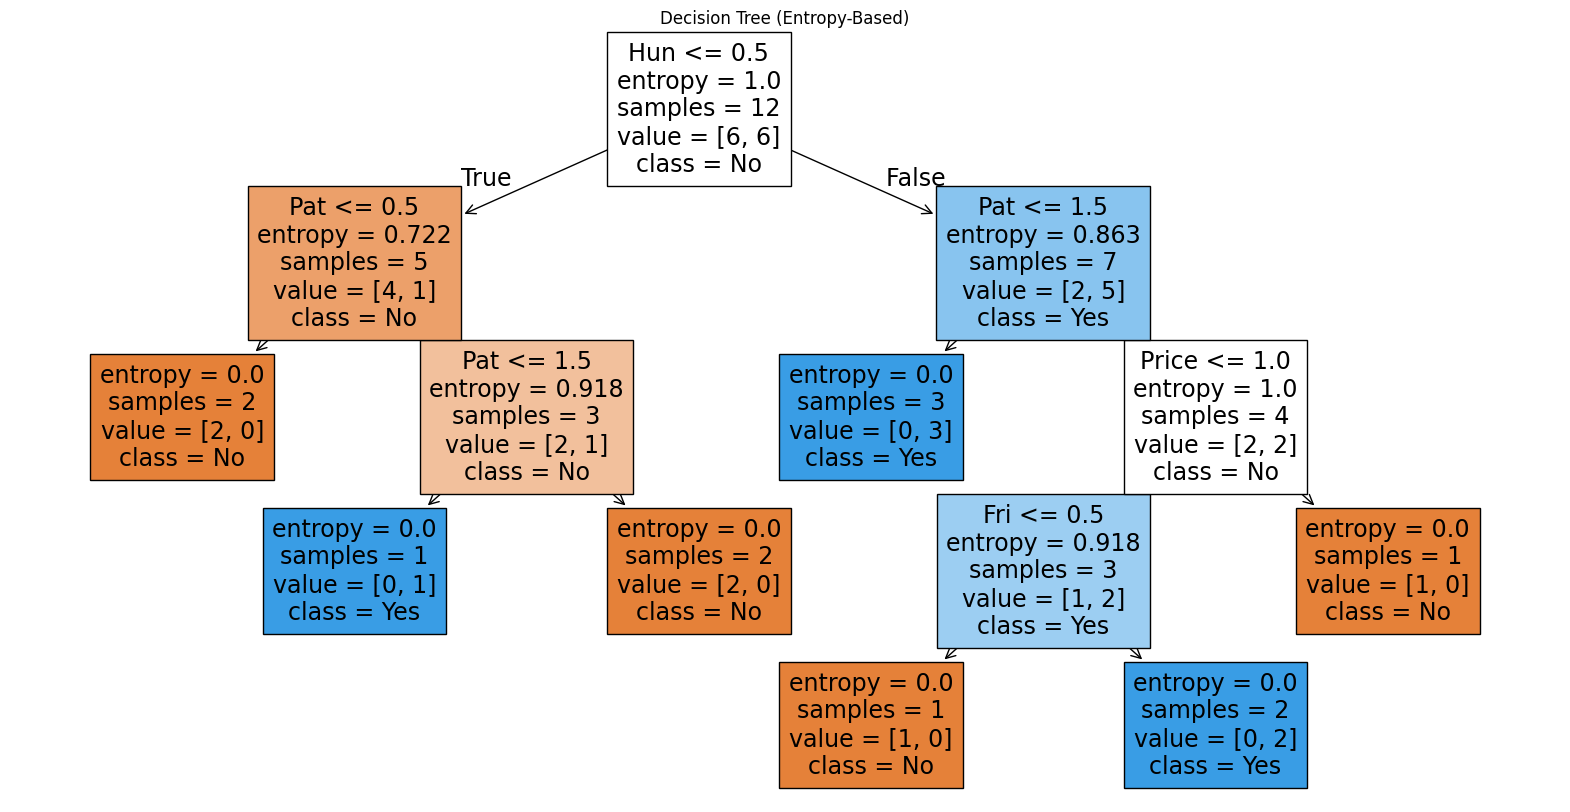

In [39]:
# Create and fit the decision tree classifier
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(data_2, labels_2)

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=features_2, class_names=["No", "Yes"], filled=True)
plt.title("Decision Tree (Entropy-Based)")
plt.show()

### Method 2

#### One-Hot Encoding Categorical Features

In [40]:
df = pd.DataFrame(data)

In [41]:
df[features]

,Alt,Bar,Fri,Hun,Pat,Price,Rain,Res,Type,Est
0,Yes,No,No,Yes,Some,$$$,No,Yes,French,0-10
1,Yes,No,No,Yes,Full,$,No,No,Thai,30-60
2,No,Yes,No,No,Some,$,No,No,Burger,0-10
3,Yes,No,Yes,Yes,Full,$,Yes,No,Thai,10-30
4,Yes,No,Yes,No,Full,$$$,No,Yes,French,>60
5,No,Yes,No,Yes,Some,$$,Yes,Yes,Italian,0-10
6,No,Yes,No,No,None,$,Yes,No,Burger,0-10
7,No,No,No,Yes,Some,$$,Yes,Yes,Thai,0-10
8,No,Yes,Yes,No,Full,$,Yes,No,Burger,>60
9,Yes,Yes,Yes,Yes,Full,$$$,No,Yes,Italian,10-30


In [43]:
encoder = OneHotEncoder()
X = encoder.fit_transform(df[features])

#### Run

In [44]:
clf_2 = DecisionTreeClassifier(criterion='entropy')
clf_2.fit(X, labels)

DecisionTreeClassifier(criterion='entropy')

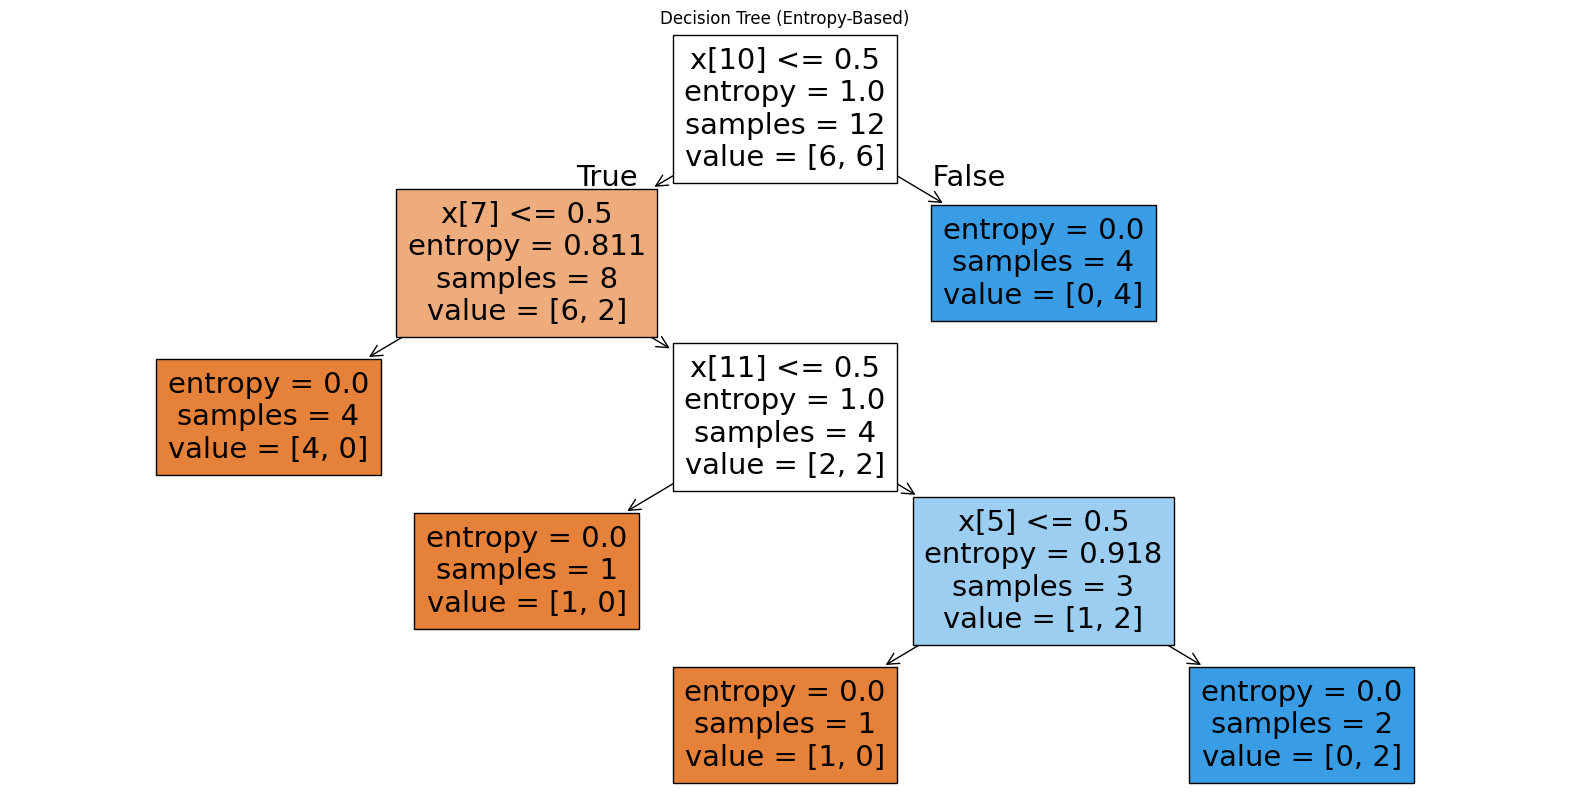

In [45]:
plt.figure(figsize=(20, 10))
plot_tree(clf_2, filled=True)
plt.title("Decision Tree (Entropy-Based)")
plt.show()
